Found 288 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


c:\Users\daevi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 70s 6s/step - accuracy: 0.5669 - loss: 0.7407 - val_accuracy: 0.9028 - val_loss: 0.2169
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.8914 - loss: 0.2296 - val_accuracy: 0.9306 - val_loss: 0.1391
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.9543 - loss: 0.1430 - val_accuracy: 0.9583 - val_loss: 0.0864
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9572 - loss: 0.1270 - val_accuracy: 0.9722 - val_loss: 0.0747
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9772 - loss: 0.0870 - val_accuracy: 1.0000 - val_loss: 0.0358
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.9549 - loss: 0.1207 - val_accuracy: 0.9861 - val_loss: 0.0450
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.9811 - loss: 0.0491 - val_accuracy: 0.9722 - val_loss: 0.0482
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.9685 - loss: 0.0936 - val_accuracy: 0.9861 - val_loss: 0.0501
Epoch 9/

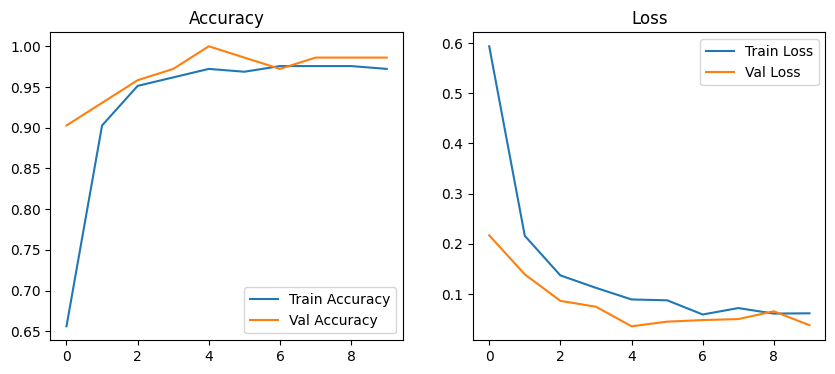

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Prediction: Tiger


C:\Users\daevi\AppData\Local\Temp\ipykernel_10100\3036295352.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result = class_names[int(prediction[0] > 0.5)]


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset paths
train_dir = r"C:\Users\daevi\Desktop\lion\train"
test_dir = r"C:\Users\daevi\Desktop\lion\test"


# Load and preprocess dataset
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split train into train/validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset="validation"
)

# Load MobileNetV2 model (pretrained)
base_model = keras.applications.MobileNetV2(
    weights='imagenet', include_top=False, input_shape=(224, 224, 3)
)

# Freeze base layers
base_model.trainable = False

# Build model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

# Load and test a new image
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img_array = keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_names = ["Lion", "Tiger"]
    
    result = class_names[int(prediction[0] > 0.5)]
    print(f"Prediction: {result}")

# Example usage
test_image_path = r"C:\Users\daevi\Desktop\lion\test/lion/180.png"
predict_image(test_image_path)
